# Worksheet 21

Name: Gauravdeep Singh Bindra

UID: U23346660

### Topics

- Logistic Regression

## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

In [18]:
# Generate linearly separable data
X, Y  = generate_line_data()

# # Plot the data
# plt.scatter(X_line[:, 0], X_line[:, 1], c=Y_line, cmap=plt.cm.Paired)
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Linearly Separable Data')
# plt.show()

In [19]:
# line_points

In [20]:
# line_labels

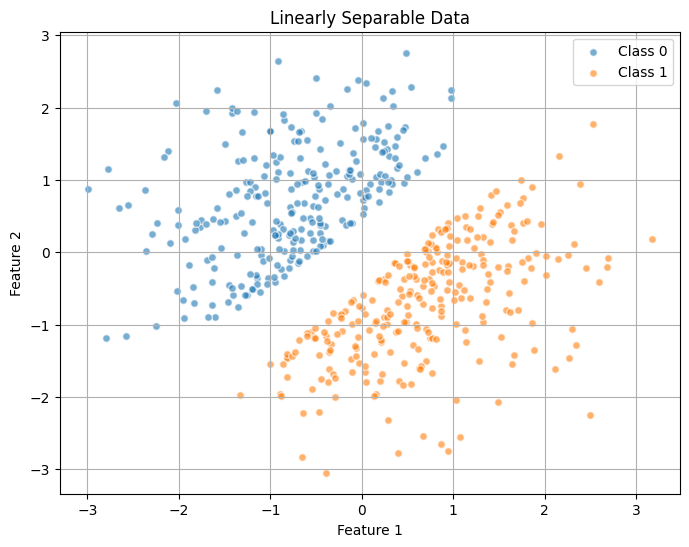

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], alpha=0.6, edgecolors='w', s=30, label='Class 0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], alpha=0.6, edgecolors='w', s=30, label='Class 1')
plt.title("Linearly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

b) Fit a logistic regression model to the data a print out the coefficients.

In [22]:
from sklearn.linear_model import LogisticRegression

# Assuming X and Y are your data and labels respectively

# Fit a logistic regression model to the data
model = LogisticRegression()
model.fit(X, Y)

# Extracting and printing the coefficients
intercept = model.intercept_[0]
coefficients = model.coef_[0]

print("Intercept (Bias):", intercept)
print("Coefficient for Feature 1:", coefficients[0])
print("Coefficient for Feature 2:", coefficients[1])

Intercept (Bias): 0.05839469321734483
Coefficient for Feature 1: 4.113379928976992
Coefficient for Feature 2: -4.101055127402645


c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

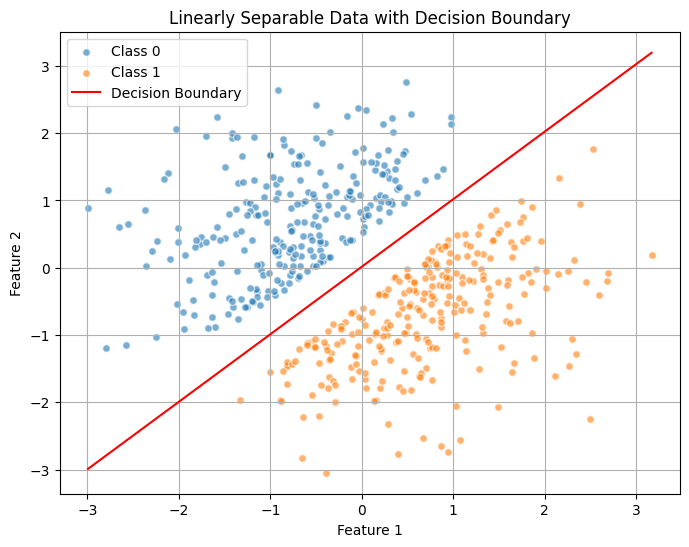

In [23]:
slope = -coefficients[0] / coefficients[1]
intercept = -intercept / coefficients[1]

# Plotting the original data
plt.figure(figsize=(8, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], alpha=0.6, edgecolors='w', s=30, label='Class 0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], alpha=0.6, edgecolors='w', s=30, label='Class 1')

# Generating x-values for the decision boundary line
x_values = np.array([min(X[:, 0]), max(X[:, 0])])

# Generating y-values for the decision boundary line
y_values = slope * x_values + intercept

# Plotting the decision boundary line
plt.plot(x_values, y_values, label="Decision Boundary", color='red')

# Setting up plot titles and labels
plt.title("Linearly Separable Data with Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

d) Using the above code, generate and plot the CIRCLE data.

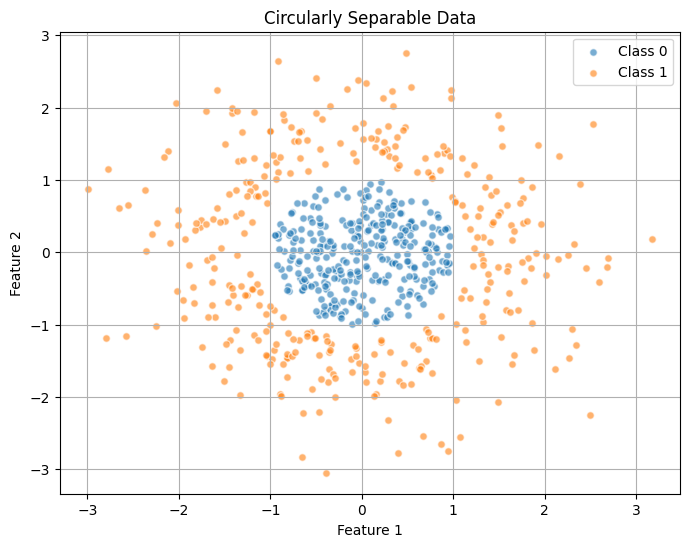

In [25]:
# Generate circular data
X_circle, Y_circle = generate_circle_data(t)

# Plotting the circular data
plt.figure(figsize=(8, 6))
plt.scatter(X_circle[Y_circle == 0][:, 0], X_circle[Y_circle == 0][:, 1], alpha=0.6, edgecolors='w', s=30, label='Class 0')
plt.scatter(X_circle[Y_circle == 1][:, 0], X_circle[Y_circle == 1][:, 1], alpha=0.6, edgecolors='w', s=30, label='Class 1')
plt.title("Circularly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

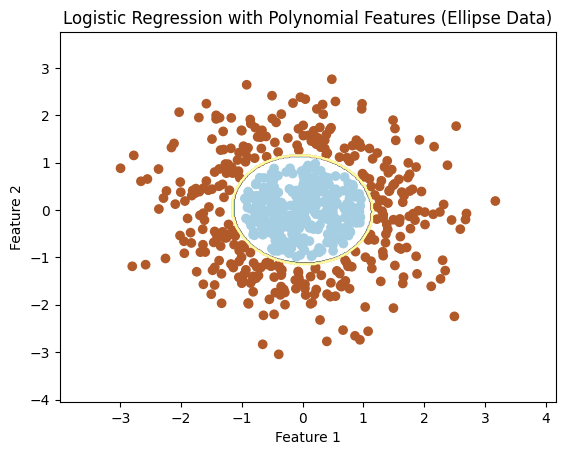

In [6]:
# Fit logistic regression model with polynomial features
degree = 2  # Degree of the polynomial transformation
model = make_pipeline(PolynomialFeatures(degree), LogisticRegression())
model.fit(X_circle, Y_circle)

# Plot decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_circle[:, 0].min() - 1, X_circle[:, 0].max() + 1
y_min, y_max = X_circle[:, 1].min() - 1, X_circle[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Scatter plot of the ellipse data
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=Y_circle, cmap=plt.cm.Paired)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression with Polynomial Features (Ellipse Data)')
plt.show()

In [26]:
# Transform the features to squared distances from the center (0, 0)
X_transformed = np.array([(x[0]**2 + x[1]**2) for x in X_circle]).reshape(-1, 1)

# Fit a logistic regression model to the transformed data
model_circular = LogisticRegression()
model_circular.fit(X_transformed, Y_circle)

# Extracting and printing the coefficients
intercept_circular = model_circular.intercept_[0]
coefficients_circular = model_circular.coef_[0]

print("Intercept (Bias):", intercept_circular)
print("Coefficient for the Transformed Feature:", coefficients_circular[0])

Intercept (Bias): -7.783287907916243
Coefficient for the Transformed Feature: 6.037731475589913


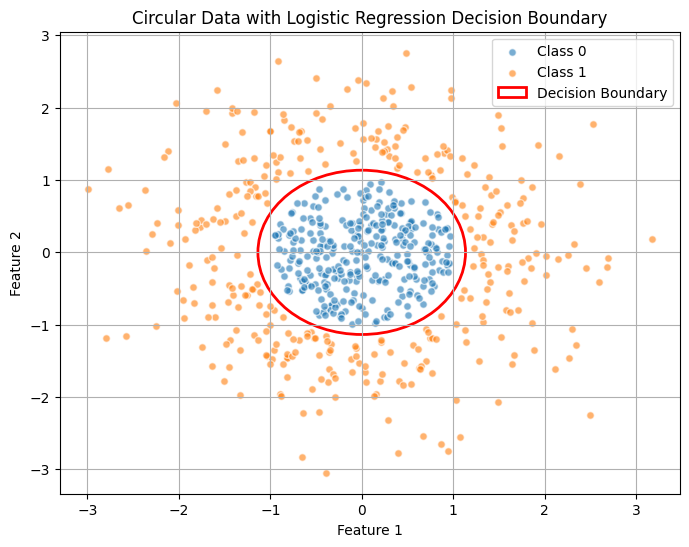

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(X_circle[Y_circle == 0][:, 0], X_circle[Y_circle == 0][:, 1], alpha=0.6, edgecolors='w', s=30, label='Class 0')
plt.scatter(X_circle[Y_circle == 1][:, 0], X_circle[Y_circle == 1][:, 1], alpha=0.6, edgecolors='w', s=30, label='Class 1')

# Calculating the decision boundary for the circular data
radius_decision_boundary = np.sqrt(-intercept_circular / coefficients_circular[0])

# Plotting the decision boundary (a circle in this case)
circle = plt.Circle((0, 0), radius_decision_boundary, color='red', fill=False, linewidth=2, label='Decision Boundary')
plt.gca().add_artist(circle)

# Setting up plot titles and labels
plt.title("Circular Data with Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

f) Plot the decision boundary using the code below.

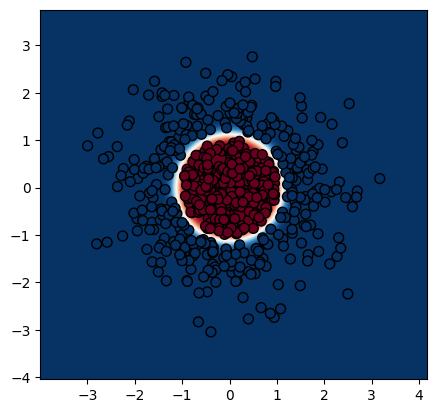

In [29]:
# Create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X_circle[:, 0].min() - 1, X_circle[:, 0].max() + 1
y_min, y_max = X_circle[:, 1].min() - 1, X_circle[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict probabilities for the mesh points
mesh_distances = ((xx**2 + yy**2)).reshape(-1, 1)
Z = model_circular.predict_proba(mesh_distances)[:, 1].reshape(xx.shape)

# Plot the contour and training points
fig, ax = plt.subplots()
ax.contourf(xx, yy, Z, cmap="RdBu", levels=np.linspace(Z.min(), Z.max(), 100))
ax.scatter(X_circle[:, 0], X_circle[:, 1], c=Y_circle, s=50, cmap="RdBu", edgecolors='k')

# Set the aspect of the plot to be equal
ax.set_aspect('equal')

plt.show()

g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

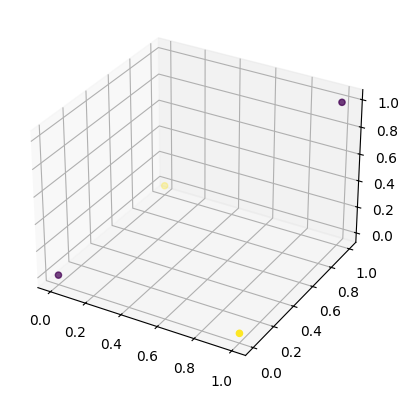

In [30]:
from mpl_toolkits.mplot3d import Axes3D

X_xor, Y_xor = generate_xor_data()
ax = plt.axes(projection='3d')
ax.scatter3D(X_xor[: , 0], X_xor[: , 1], X_xor[: , 0]* X_xor[: , 1], c=Y_xor)
plt.show()

h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

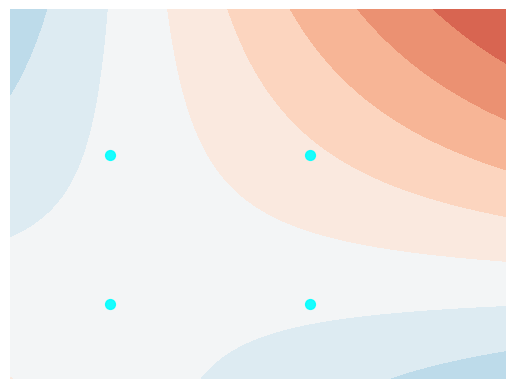

In [33]:
poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression(verbose=0)
model = make_pipeline(poly, lr).fit(X_xor, Y_xor)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X_xor[:, 0].min() - .5, X_xor[:, 0].max() + 1
y_min, y_max = X_xor[:, 1].min() - .5, X_xor[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X_xor[:, 0], X_xor[:, 1], color=Y_xor, s=50, alpha=0.9)
plt.show()

  0%|          | 3/20000 [00:00<14:15, 23.37it/s]0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
100%|██████████| 20000/20000 [08:32<00:00, 39.01it/s]


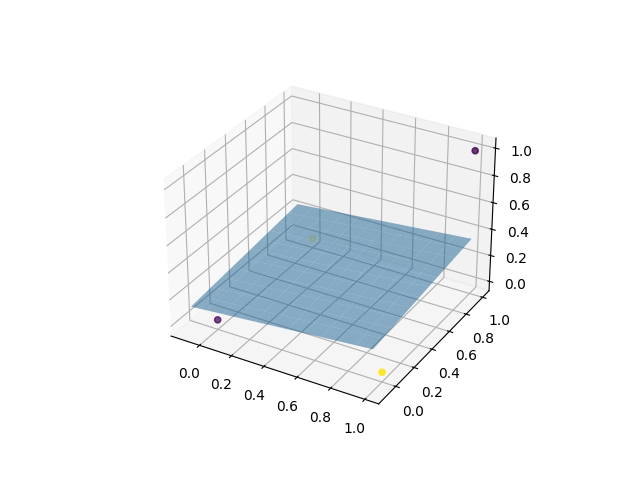

In [40]:
%matplotlib widget
for i in tqdm(range(20000)):
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
        X_transform = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(X_xor)
        model = LogisticRegression(verbose=0, solver=solver, random_state=i, max_iter=10000)
        model.fit(X_transform, Y_xor)
        # print(model.score(X_transform, Y_xor))
        if model.score(X_transform, Y_xor) > .75:
            # print("random state = ", i)
            # print("solver = ", solver)
            break

# print(model.coef_)
# print(model.intercept_)

xx, yy = np.meshgrid([x / 10 for x in range(-1, 11)], [x / 10 for x in range(-1, 11)])
z = - model.intercept_ / model.coef_[0][2] - model.coef_[0][0] * xx / model.coef_[0][2] - model.coef_[0][1] * yy / model.coef_[0][2]

ax = plt.axes(projection='3d')
ax.scatter3D(X_xor[: , 0], X_xor[: , 1], X_xor[: , 0]* X_xor[: , 1], c=Y_xor)
ax.plot_surface(xx, yy, z, alpha=0.5)
plt.show()

In [39]:
from tqdm import tqdm

i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54575D+03    |proj g|=  2.20592D+03

At iterate    1    f=  1.25980D+03    |proj g|=  7.85645D+02

At iterate    2    f=  1.16386D+03    |proj g|=  4.67390D+02

At iterate    3    f=  1.12014D+03    |proj g|=  8.53618D+02

At iterate    4    f=  1.07857D+03    |proj g|=  2.28644D+02

At iterate    5    f=  1.03868D+03    |proj g|=  2.46093D+02

At iterate    6    f=  8.75292D+02    |proj g|=  2.23884D+02

At iterate    7    f=  6.72984D+02    |proj g|=  1.69393D+02

At iterate    8    f=  4.06106D+02    |proj g|=  3.22571D+02

At iterate    9    f=  3.84632D+02    |proj g|=  4.67515D+02

At iterate   10    f=  2.26564D+02    |proj g|=  2.61932D+02

At iterate   11    f=  1.84398D+02    |proj g|=  1.15386D+02

At iterate   12    f=  1.54569D+02    |proj g|=  6.06745D+01

At iterate   13    f=  1.3

 This problem is unconstrained.
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


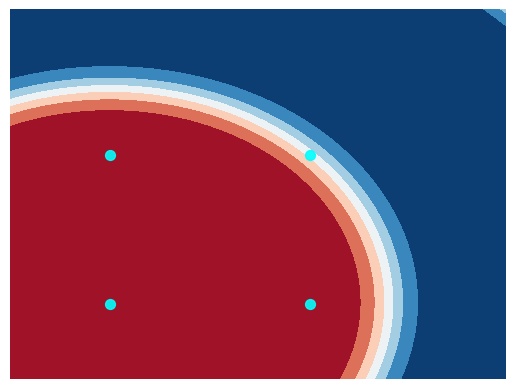

In [ ]:
t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2,
                                random_state=0)

# CIRCLES
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

X, Y = generate_circles_data(t)

poly = PolynomialFeatures(2)
lr = LogisticRegression(verbose=2)
model = make_pipeline(poly, lr).fit(X, Y)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X_xor[:, 0].min() - .5, X_xor[:, 0].max() + 1
y_min, y_max = X_xor[:, 1].min() - .5, X_xor[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X_xor[:, 0], X_xor[:, 1], color=Y_xor, s=50, alpha=0.9)
plt.show()